In [4]:
# Boolean aliases ----
T = True
F = False
# Standard libs ----
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
# Personal libs ---- 
from networks.toy import TOY
from networks.MAC.mac57 import MAC57
from modules.hierarmerge import Hierarchy
from plotting_modules.plotting_H import Plot_H
from plotting_modules.plotting_N import Plot_N
from modules.hierarentropy import Hierarchical_Entropy
from modules.flatmap import FLATMAP
from modules.colregion import colregion
from various.data_transformations import maps
from modules.discovery import discovery_channel
from various.network_tools import *

# Declare global variables ----
linkage = "single"
nlog10 = F
lookup = F
prob = F
cut = F
structure = "FLNe"
mode = "ZERO"
distance = "tracto16"
nature = "original"
imputation_method = ""
topology = "MIX"
mapping = "trivial"
index  = "Hellinger2"
discovery = "discovery_7"
bias = 0.0
opt_score = ["_S"]
save_data = T
version = "57d106"
__nodes__ = 57
__inj__ = 57

In [5]:
NET = MAC57(
  linkage, mode,
  nlog10 = nlog10,
  structure = structure,
  lookup = lookup,
  version = version,
  nature = nature,
  model = imputation_method,
  distance = distance,
  inj = __inj__,
  topology = topology,
  index = index,
  mapping = mapping,
  cut = cut,
  b = bias
)

NET_H = read_class(
  NET.pickle_path,
  "hanalysis"
)

../pickle/MAC/57d106/FLNe/original/tracto16/57/SINGLE_106_57/ZERO/MIX_Hellinger2_trivial/b_0.0/discovery_7/hanalysis.pk


In [ ]:
OMG_ENSEMBLE = []
C_ENSEMBLE = []

for i in np.arange(1000):
  A = NET.A
  CC = NET.CC
  D = NET.D

  permc = np.random.permutation(np.arange(NET.nodes))
  permr = np.random.permutation(np.arange(NET.nodes, NET.rows))
  permr = np.hstack([permc, permr])

  A = A[permr, :][:, permc]
  D = D[permr, :][:, permr]
  CC = CC[permr, :][:, permc]

  RAND = MAC57(
    linkage, mode,
    nlog10 = nlog10,
    structure = structure,
    lookup = lookup,
    version = version,
    nature = nature,
    model = imputation_method,
    distance = distance,
    inj = __inj__,
    topology = topology,
    index = index,
    mapping = mapping,
    cut = cut,
    b = bias
  )

  RAND.A = A
  RAND.D = D
  RAND.CC = CC
  RAND.struct_labels = RAND.struct_labels[permr]

  H = Hierarchy(
    RAND, A, A, D,
    __nodes__, linkage, mode, lookup=lookup,
    index=index
  )
  ## Compute features ----
  H.BH_features_cpp_no_mu()
  ## Compute lq arbre de merde ----
  H.la_abre_a_merde_cpp(H.BH[0])
  # Set labels to network ----
  L = colregion(RAND, labels_name=f"labels{__inj__}")
  H.set_colregion(L)
  H.colregion.labels = RAND.struct_labels
  H.delete_dist_matrix()

  for SCORE in opt_score:
    # Get best K and R ----
    K, R, TH = get_best_kr_equivalence(SCORE, H)
    for k, r, th in zip(K, R, TH):
      H.set_kr(k, r, score=SCORE)
      rlabels = get_labels_from_Z(H.Z, r)
      rlabels = skim_partition(rlabels)
      # Overlap ----
      for direction in ["both"]: # ,  "source", "target",
        overlap, data_nocs, noc_sizes, rlabels2  = discovery_channel[discovery](H, k, rlabels, direction=direction, index=index)
        cover = omega_index_format(rlabels2,  data_nocs, RAND.struct_labels[:NET.nodes])
        OMGi = omega_index(cover, NET_H.cover[direction]["_S"])
        OMG_ENSEMBLE.append(OMGi)


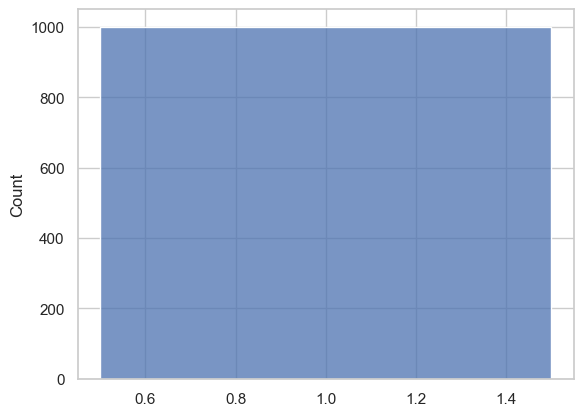

In [7]:
sns.histplot(
  x=OMG_ENSEMBLE
)
plt.show()